In [96]:
import pandas as pd

df_train = pd.read_csv('dataset/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [97]:
df_test = pd.read_csv('dataset/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [98]:
df_train.Sentiment.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

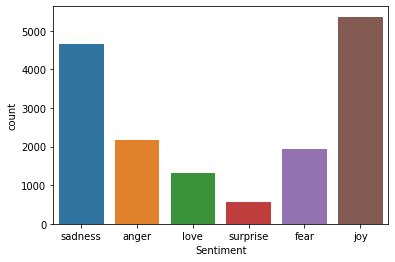

In [99]:
import seaborn as sns
sns.countplot(x="Sentiment",data=df_train);

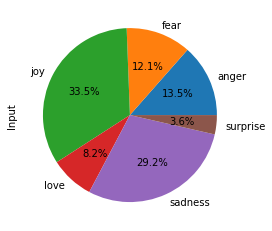

In [100]:
data = df_train.groupby("Sentiment")["Input"].count()
data.plot.pie(autopct="%.1f%%");

In [101]:
import numpy as np
np.unique(df_train['Sentiment'])

df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)

In [102]:
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


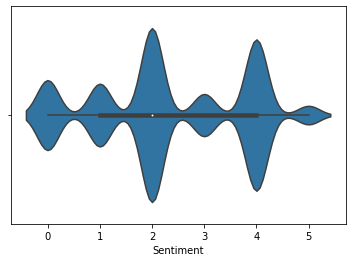

In [103]:
sns.violinplot(x="Sentiment",data=df_train);

In [93]:
df_train.Sentiment

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
15995    sadness
15996    sadness
15997        joy
15998      anger
15999    sadness
Name: Sentiment, Length: 16000, dtype: object

In [104]:
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [105]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [106]:
df_train.describe()

,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [107]:
x = df_train["Input"]
y = df_train["Sentiment"]
print(x.shape,y.shape)

(16000,) (16000,)


In [108]:
message = x.copy()
voc_size = 10000

message[0]

'i didnt feel humiliated'

In [109]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [110]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
corpus[0]    

'didnt feel humili'

In [111]:
from tensorflow import keras
from keras_preprocessing.text import one_hot

one_hot_representation = [one_hot(words,voc_size) for words in corpus]

one_hot_representation[0]

[2187, 470, 7086]

In [112]:
from keras.preprocessing.sequence import pad_sequences

sent_length = 20
embedded_doc = pad_sequences(one_hot_representation,padding='pre',maxlen=sent_length)
embedded_doc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 2187,  470, 7086])

In [132]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional ,Conv1D, GlobalMaxPooling1D
dimension = 40
# Convolution
kernel_size = 3
filters = 256

model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(Bidirectional(LSTM(100)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(1,activation='relu'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 40)            400000    
                                                                 
 conv1d_4 (Conv1D)           (None, 18, 256)           30976     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 497,025
Trainable params: 497,025
Non-trainable params: 0
________________________________________________

In [126]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional
dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________


In [127]:
final_input = np.array(embedded_doc)
final_output = np.array(y)

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [133]:
batch_size = 256
epochs = 6

hist = model.fit(x_train, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test,y_test))

Epoch 1/6
42/42 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/6
42/42 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/6
42/42 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/6
42/42 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/6
42/42 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/6
42/42 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259


Epoch 1/10
168/168 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/10
168/168 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/10
168/168 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/10
168/168 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/10
168/168 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/10
168/168 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 7/10
168/168 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 8/10
168/168 [============================

In [121]:
def suicide_avoider(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)


  voc_size = 5000
  one_hot_r = [one_hot(word,voc_size) for word in corpus]

  max_length = 20
  embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')

  dimension = 40
  model = Sequential()
  model.add(Embedding(voc_size,dimension,input_length=max_length))
  model.add(Bidirectional(LSTM(100)))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
  prediction= model.predict(np.array(embedded_docs))
  if prediction.all() ==0:
    print("person is angry")
  elif prediction.all() ==1:
    print("person is in fear")
  elif prediction.all() ==2:
    print("person is in joy")
  elif prediction.all() ==3:
    print("person is in love")
  elif prediction.all() ==4:
    print("person is sad")
  else:
    print("person is surprise")

In [27]:
x = str(input())
suicide_avoider(x)

i was feeling a little vain when i did this one	
person is in fear
